In [ ]:
%cd /content/drive/MyDrive/My projects/Face mask detection

/content/drive/MyDrive/My projects/Face mask detection


In [ ]:
!pip install -r requirements.txt

  Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
  Using cached imutils-0.5.3.tar.gz (17 kB)
  Using cached numpy-1.18.2-cp37-cp37m-manylinux1_x86_64.whl (20.2 MB)
  Using cached matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl (12.4 MB)
     |████████████████████████████████| 28.2 MB 1.7 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 495.0 MB 29 kB/s 
     |████████████████████████████████| 489.6 MB 27 kB/s 
     |████████████████████████████████| 463.8 MB 35 kB/s 
     |████████████████████████████████| 462 kB 28.1 MB/s 
     |████████████████████████████████| 132 kB 51.5 MB/s 
     |████████████████████████████████| 5.6 MB 44.6 MB/s 
     |████████████████████████████████| 458.3 MB 14 kB/s 
     |████████████████████████████████| 458.3 MB 15 kB/s 
     |████████████████████████████████| 458.3 MB 11 kB/s 
     |████████████████████████████████| 460.3 MB 8.7 kB/s 
     |████████████████████████████████| 4.0 MB 35.5 MB/s 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os


ini_learn_rate = 1e-4 # Initial learning rate
Epochs = 20           # Number of epochs
bs = 32               # Batch size

directory = r"/content/drive/MyDrive/My projects/Face mask detection/dataset"
categorys = ["with_mask", "without_mask"]

data = []
labels = []

for category in categorys:
    path = os.path.join(directory, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size = (224,224))
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(category)


LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype = "float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.20, stratify = labels, random_state = 40)

augment = ImageDataGenerator(
    rotation_range = 20,
    zoom_range = 0.15,
    width_shift_range = 0.2,
    height_shift_range = 0.15,
    horizontal_flip = True,
    fill_mode = "nearest")

baseModel = MobileNetV2(weights = "imagenet", include_top = False, input_tensor = Input(shape = (224,224,3)))

headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (7,7))(headModel)
headModel = Flatten(name = "flatten")(headModel)
headModel = Dense(128, activation = "relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation = "softmax")(headModel)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False

print("[INFO compiling model...")
opt = Adam(lr = ini_learn_rate, decay = ini_learn_rate/Epochs)
model.compile(loss = "binary_crossentropy", optimizer = opt, metrics = ["accuracy"])

print("[INFO] traning head...")
H = model.fit(
    augment.flow(trainX, trainY , batch_size = bs),
    steps_per_epoch = len(trainX) // bs,
    validation_data = (testX, testY),
    validation_steps = len(testX) // bs,
    epochs = Epochs)

print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size = bs)

predIdxs = np.argmax(predIdxs, axis = 1)



[INFO compiling model...
[INFO] traning head...
Epoch 1/20
95/95 [==============================] - 42s 440ms/step - loss: 0.3581 - accuracy: 0.8322 - val_loss: 0.1152 - val_accuracy: 0.9687
Epoch 2/20
95/95 [==============================] - 38s 396ms/step - loss: 0.1201 - accuracy: 0.9601 - val_loss: 0.0763 - val_accuracy: 0.9713
Epoch 3/20
95/95 [==============================] - 38s 399ms/step - loss: 0.0774 - accuracy: 0.9736 - val_loss: 0.0680 - val_accuracy: 0.9713
Epoch 4/20
95/95 [==============================] - 37s 386ms/step - loss: 0.0707 - accuracy: 0.9750 - val_loss: 0.0551 - val_accuracy: 0.9791
Epoch 5/20
95/95 [==============================] - 37s 393ms/step - loss: 0.0613 - accuracy: 0.9802 - val_loss: 0.0523 - val_accuracy: 0.9791
Epoch 6/20
95/95 [==============================] - 39s 406ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0518 - val_accuracy: 0.9752
Epoch 7/20
95/95 [==============================] - 38s 401ms/step - loss: 0.0367 - accuracy: 

TypeError: ignored

              precision    recall  f1-score   support

   with_mask       0.99      0.99      0.99       383
without_mask       0.99      0.99      0.99       384

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767

[INFO] saving mask detector model...


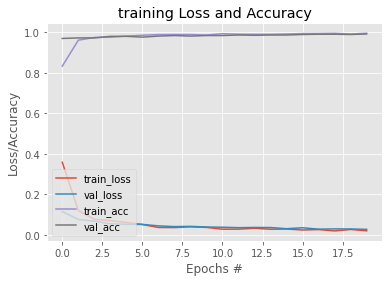

In [ ]:
print(classification_report(testY.argmax(axis = 1), predIdxs, target_names = LB.classes_))

print("[INFO] saving mask detector model...")
model.save("mask_detection.model", save_format = "h5")

N = Epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], Label = "train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], Label = "val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], Label = "train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], Label = "val_acc")
plt.title("training Loss and Accuracy")
plt.xlabel("Epochs #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc = "lower left")
plt.savefig("plot.png")